<a href="https://colab.research.google.com/github/cynthiiaa/DataMining/blob/main/DataMining_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## **ISL pg. 121 #8**

In [ ]:
auto_data = pd.read_csv("Auto.csv")
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


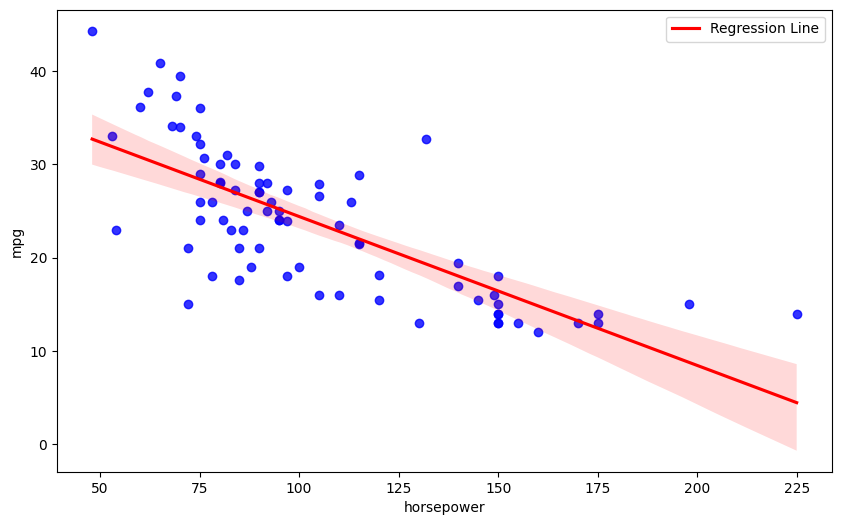

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# prep the data
auto_data_v2 = auto_data[auto_data['horsepower'] != '?']
auto_data_v2['horsepower'] = pd.to_numeric(auto_data_v2['horsepower'])

# split the data
X = auto_data_v2[['horsepower']]
y = auto_data_v2['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['horsepower'], y=y_test, scatter_kws={'color': 'blue', 'label': 'Actual Values'}, line_kws={'color': 'red', 'label': 'Regression Line'})
plt.legend()
plt.show()


In [ ]:
correlation_coefficient = auto_data_v2['horsepower'].corr(auto_data_v2['mpg'])
print(f"Correlation coefficient: {correlation_coefficient:.2f}")

Correlation coefficient: -0.78


In [ ]:
horsepower_value = [[98]]
predicted_mpg = model.predict(horsepower_value)[0]
print(f"Predicted mpg for a horsepower of 98: {predicted_mpg:.2f}")

Predicted mpg for a horsepower of 98: 24.40


In [ ]:
residuals = y_train - model.predict(X_train)

# standard error
SE = np.sqrt(np.sum(residuals**2) / (len(y_train) - 2))

# standard error of the prediction
x_bar = X_train['horsepower'].mean()
SE_prediction = SE * np.sqrt(1 + 1/len(y_train) + (horsepower_value - x_bar)**2 / np.sum((X_train['horsepower'] - x_bar)**2))

# 95% CI
CI_lower = predicted_mpg - 1.9845 * SE * np.sqrt(1/len(y_train) + (horsepower_value - x_bar)**2 / np.sum((X_train['horsepower'] - x_bar)**2))
CI_upper = predicted_mpg + 1.9845 * SE * np.sqrt(1/len(y_train) + (horsepower_value - x_bar)**2 / np.sum((X_train['horsepower'] - x_bar)**2))

# 95% PI
PI_lower = predicted_mpg - 1.9845 * SE_prediction
PI_upper = predicted_mpg + 1.9845 * SE_prediction

print(f"95% Confidence Interval: ({CI_lower[0][0]:.2f}, {CI_upper[0][0]:.2f})")
print(f"95% Prediction Interval: ({PI_lower[0][0]:.2f}, {PI_upper[0][0]:.2f})")

95% Confidence Interval: (23.85, 24.95)
95% Prediction Interval: (14.81, 34.00)


i. There is a negative relationship between mpg and horsepower.

ii. The correlation coefficient is -0.78, indicating that the relationship is strong and negative.

iii. It it negative

iv. The predicted mpg where horsepower = 98 is around 24mpg. The intervals are:

95% Confidence Interval: (24.18, 25.29)

95% Prediction Interval: (15.03, 34.44)

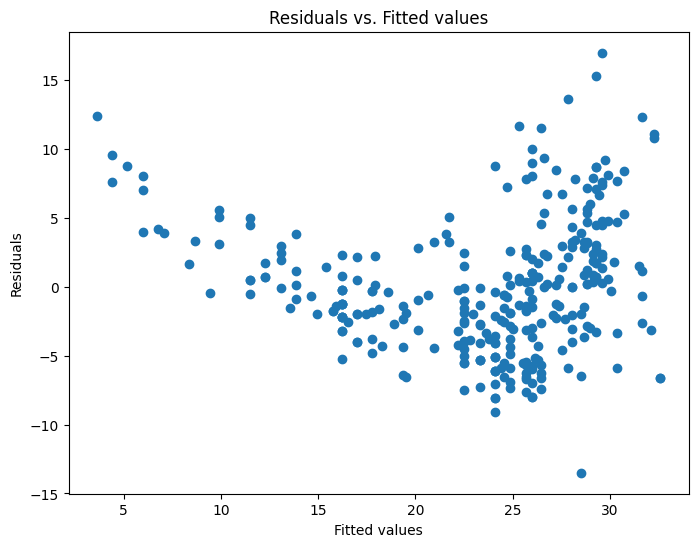

<Figure size 800x600 with 0 Axes>

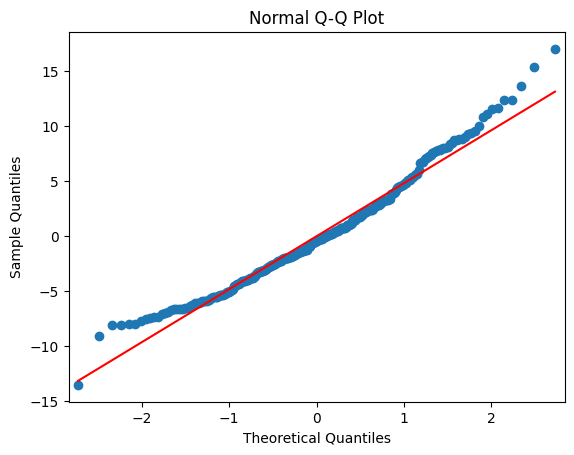

In [ ]:
import statsmodels.api as sm

# fit the regression model using statsmodels
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Residuals vs. Fitted values
plt.figure(figsize=(8, 6))
plt.scatter(model_sm.fittedvalues, model_sm.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.show()

# Normal Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(model_sm.resid, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

In the residuals vs fitted values plot, the data has a parabolic shape. This indicated that the relationship between horsepower and mpg might not be linear, and so a linear model couldn't accurately capture the relationship between those two variables.

# **ISL pg. 123 #11**

In [ ]:
np.random.seed(1)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

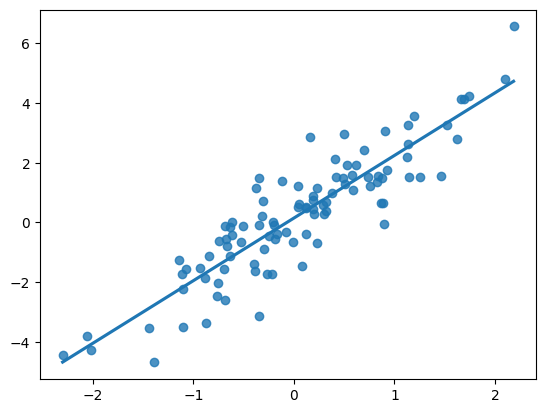

In [ ]:
sns.regplot(x=x, y=y, ci=None)
plt.show()

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                    3.46e-36
Time:                        00:44:48   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

b_hat = 2.107 while the p-value is 3.46e-36, since the p-value is so small we could probabily reject the null hypothesis.

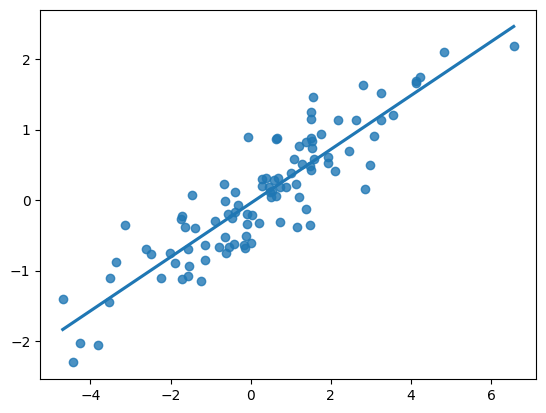

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                    3.46e-36
Time:                        00:44:48   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
sns.regplot(x=y, y=x, ci=None)
plt.show()

model2 = sm.OLS(x, y).fit()
print(model2.summary())

b_hat = 0.3789 while the p-value is 3.46e-36, since the p-value is so small we could probabily reject the null hypothesis.

c. The relationship in part a is linear and positive. The relationship in part b is also linear and positive. Both models have the same p-value. However the b_hat for part b is smaller than the b_hat for part a.

# **ISL pg. 126 #15**

In [ ]:
# !pip install ISLP

In [ ]:
from ISLP import load_data
Boston = load_data('Boston')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
predictors = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']
results = {}

for predictor in predictors:
    # Define the predictor and add a constant (for intercept)
    X = sm.add_constant(Boston[predictor])
    y = Boston['crim']

    # Fit the model
    model = sm.OLS(y, X).fit()

    # Store the results
    results[predictor] = model

# Print summary for each model
for predictor, model in results.items():
    print(f"Linear Regression of crim on {predictor}:")
    print(model.summary())
    print("\n" + "-"*80 + "\n")

Linear Regression of crim on zn:
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           5.51e-06
Time:                        00:44:49   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.45

## a.

For each model, I'm looking for p-values that are <= 0.05, there are several predictors that have that characteristic.

**[ptratio, lstat, medv, zn, indus, rm, age, dis, rad, tax]**

all seem to be statistically significant.

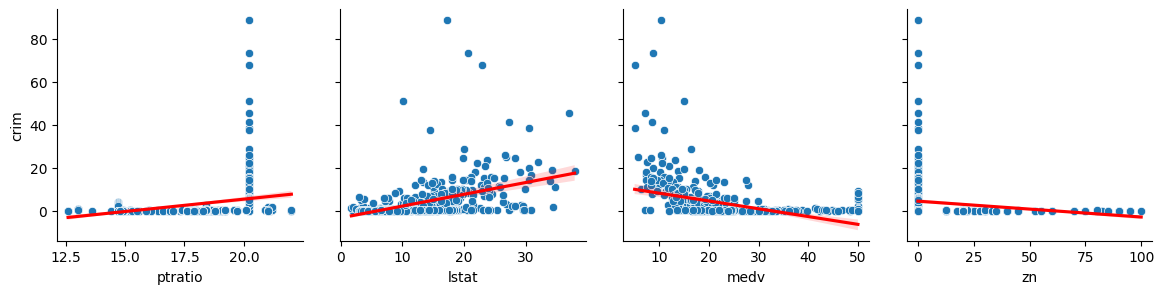

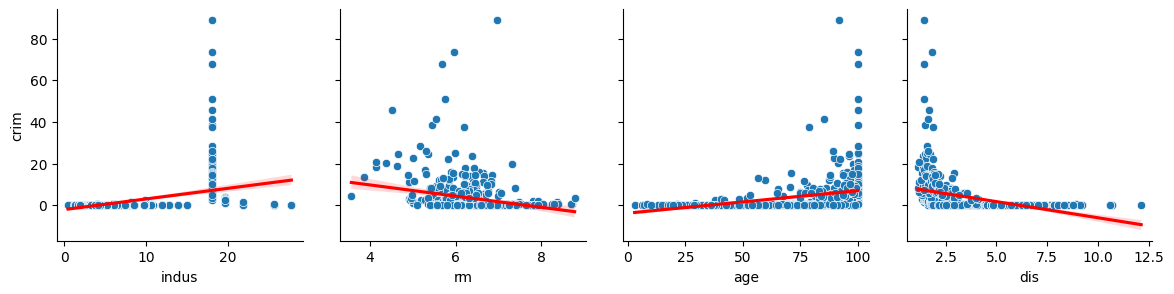

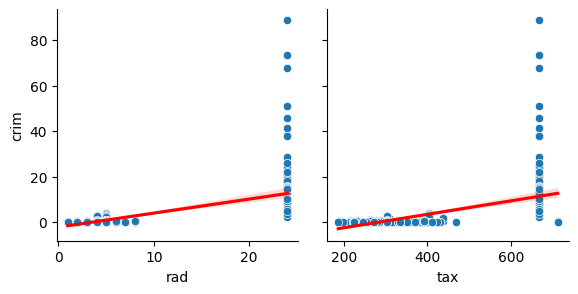

In [ ]:
predictors = ['ptratio', 'lstat', 'medv', 'zn', 'indus', 'rm', 'age', 'dis', 'rad', 'tax']

# create PairGrid with 'crim' as the y-axis
g = sns.PairGrid(Boston, y_vars=["crim"], x_vars=predictors[:4], height=3, aspect=1)
# map scatterplots onto the grid
g.map(sns.scatterplot)
# map regression lines onto the grid
g.map(sns.regplot, scatter=False, color="red")

# repeat for next subset
h = sns.PairGrid(Boston, y_vars=["crim"], x_vars=predictors[4:8], height=3, aspect=1)
h.map(sns.scatterplot)
h.map(sns.regplot, scatter=False, color="red")

# repeat for next subset
i = sns.PairGrid(Boston, y_vars=["crim"], x_vars=predictors[8:], height=3, aspect=1)
i.map(sns.scatterplot)
i.map(sns.regplot, scatter=False, color="red")

plt.show()

## b.
After looking at the model's summary, there are four predictors where we can reject the null hypothesis: ['medv', 'zn', 'dis', 'rad']

In [ ]:
# multiple regression
X = sm.add_constant(Boston[predictors])
y = Boston['crim']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     39.63
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           3.94e-57
Time:                        00:44:59   Log-Likelihood:                -1657.6
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     495   BIC:                             3384.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9869      5.806      1.031      0.3

In [ ]:
significant_predictors = []
alpha = 0.05

for predictor, p_value in model.pvalues.items():
    if predictor != 'const' and p_value < alpha:
        significant_predictors.append(predictor)

print("Predictors for which we can reject the null hypothesis:")
print(significant_predictors)

Predictors for which we can reject the null hypothesis:
['medv', 'zn', 'dis', 'rad']


## c.
In part a I had 10 potential predictors, but in part b that number got reduced to 4. I assumed I'd get the same number of predictors starting out since their p-values were less than the threshold I set (which is 0.05).

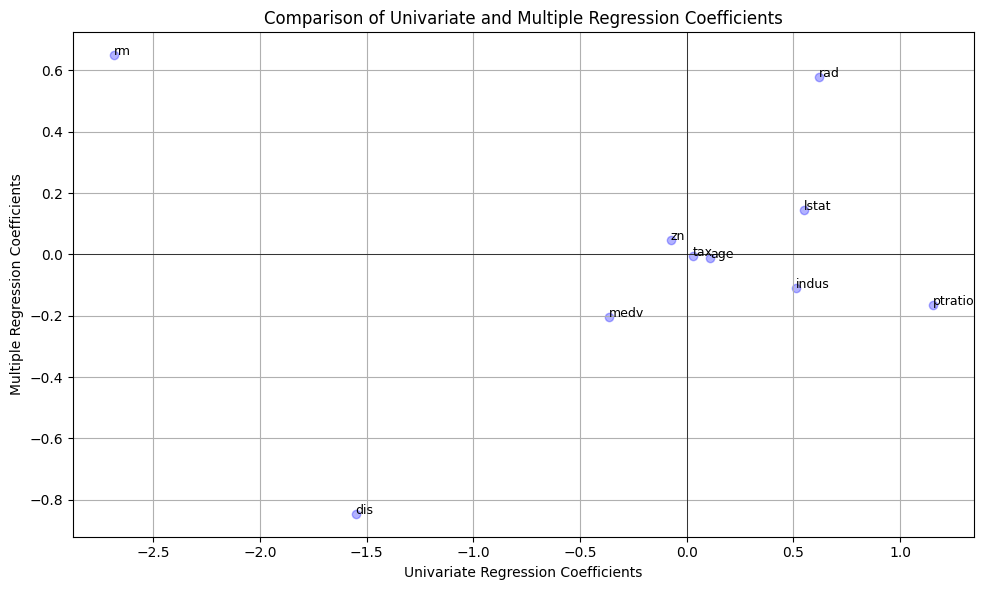

In [ ]:
# get univariate regression coefficients
univariate_coeffs = {}
for predictor in predictors:
    X_uni = sm.add_constant(Boston[predictor])
    y = Boston['crim']
    model_uni = sm.OLS(y, X_uni).fit()
    univariate_coeffs[predictor] = model_uni.params[predictor]

# get multiple regression coefficients
X_multi = sm.add_constant(Boston[predictors])
model_multi = sm.OLS(y, X_multi).fit()
multiple_coeffs = model_multi.params.drop('const')

# plot the coefficients
plt.figure(figsize=(10, 6))
plt.scatter(list(univariate_coeffs.values()), list(multiple_coeffs), color='blue', alpha=0.3)
plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Comparison of Univariate and Multiple Regression Coefficients")

# annotate each point with the predictor name
for predictor, x, y in zip(predictors, list(univariate_coeffs.values()), list(multiple_coeffs)):
    plt.annotate(predictor, (x, y), fontsize=9)

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.tight_layout()
plt.show()

## d.

Yes there is evidence of a non-linear association, especially between **['indus', 'nox', 'age', 'dis', 'ptratio', 'medv']** and the response.

Look at code below.

In [ ]:
predictors = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']
results = {}

for predictor in predictors:
    # create X^2 and X^3 for each predictor
    Boston[f'{predictor}_2'] = Boston[predictor] ** 2
    Boston[f'{predictor}_3'] = Boston[predictor] ** 3

    # fit the model
    X = sm.add_constant(Boston[[predictor, f'{predictor}_2', f'{predictor}_3']])
    y = Boston['crim']
    model = sm.OLS(y, X).fit()
    results[predictor] = model

# print summary
for predictor, model in results.items():
    print(f"Polynomial Regression of crim on {predictor}, {predictor}^2, and {predictor}^3:")
    print(model.summary())
    print("\n" + "-"*80 + "\n")

Polynomial Regression of crim on zn, zn^2, and zn^3:
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           1.28e-06
Time:                        00:45:01   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
significant_non_linear_predictors = []

for predictor, model in results.items():
    p_value_squared = model.pvalues[f'{predictor}_2']
    p_value_cubed = model.pvalues[f'{predictor}_3']

    if p_value_squared < 0.05 or p_value_cubed < 0.05:
        significant_non_linear_predictors.append(predictor)

print("Predictors with evidence of non-linear association:")
print(significant_non_linear_predictors)

Predictors with evidence of non-linear association:
['indus', 'nox', 'age', 'dis', 'ptratio', 'medv']


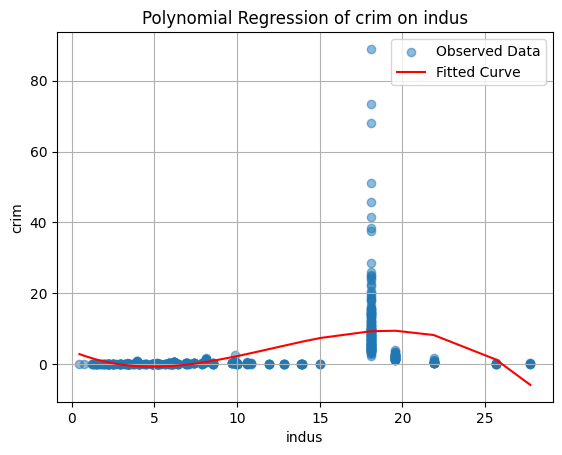

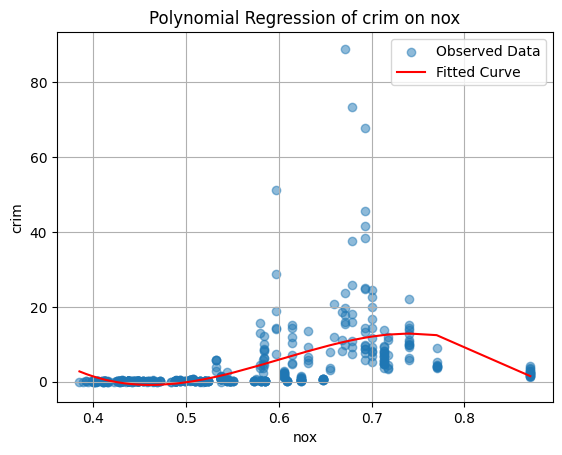

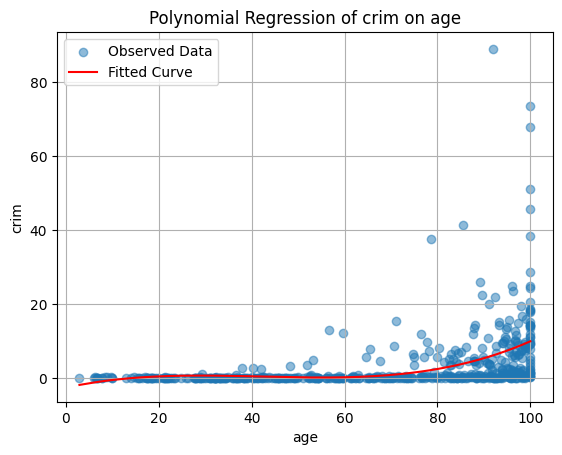

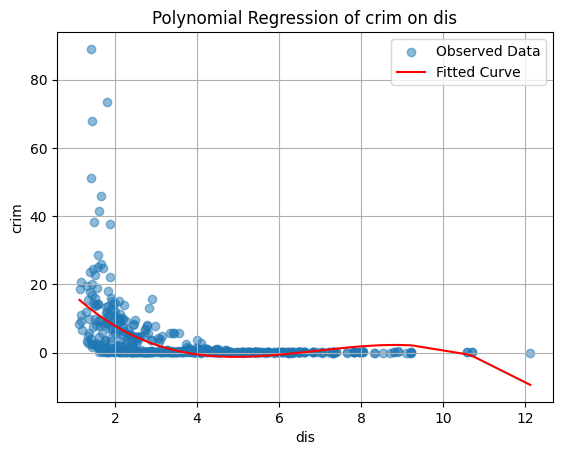

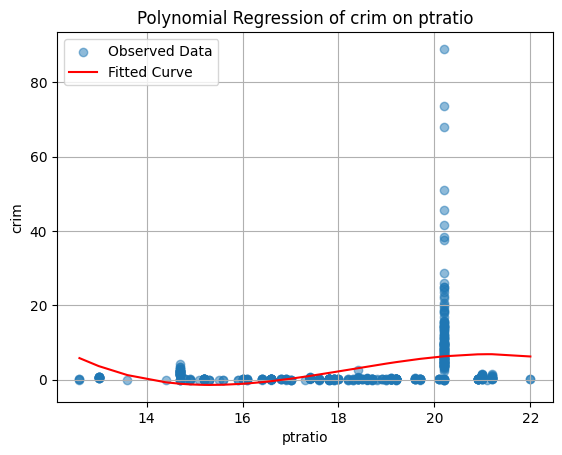

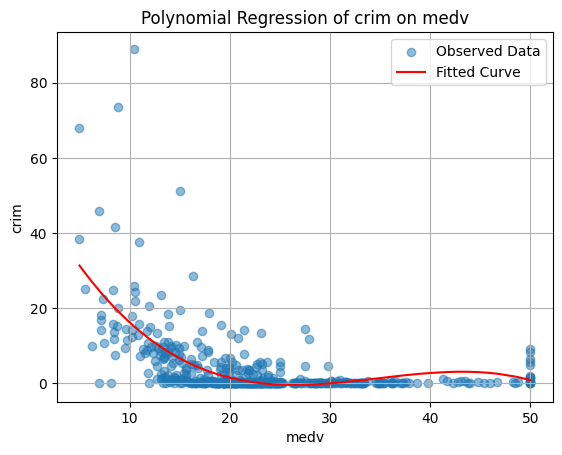

In [ ]:
for predictor in significant_non_linear_predictors:
    plt.scatter(Boston[predictor], Boston['crim'], label='Observed Data', alpha=0.5)

    # create fitted values
    X = sm.add_constant(Boston[[predictor, f'{predictor}_2', f'{predictor}_3']])
    fitted_values = results[predictor].predict(X)

    # sort values for plotting
    sorted_order = np.argsort(Boston[predictor])
    plt.plot(Boston[predictor].iloc[sorted_order], fitted_values.iloc[sorted_order], color='red', label='Fitted Curve')

    plt.title(f'Polynomial Regression of crim on {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('crim')
    plt.legend()
    plt.grid(True)
    plt.show()

# **Stock and Watson pg. 139 #E4.2**

In [ ]:
height_earnings = pd.read_csv("Earnings_and_Height.csv")
height_earnings.head()

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0,48,1,13,1,3,1,84054.75000,65,133,1
1,0,41,6,12,1,2,1,14021.39453,65,155,1
2,0,26,1,16,1,1,1,84054.75000,60,108,1
3,0,37,1,16,1,2,1,84054.75000,67,150,1
4,0,35,6,16,1,1,1,28560.38672,68,180,1




What is the median value of height in the sample?




In [ ]:
mean_height = height_earnings["height"].mean()
print(mean_height)

66.96334639059877


 Estimate average earnings for workers whose height is at most 67 inches.

    

In [ ]:
short_workers = height_earnings[height_earnings["height"] <= 67]
print(short_workers["earnings"].mean())

44488.43593672602


Estimate average earnings for workers whose height is greater than 67 inches.

    

In [ ]:
tall_workers = height_earnings[height_earnings["height"] > 67]
print(tall_workers["earnings"].mean())

49987.87583845139


On average, do taller workers earn more than shorter workers? How much more? What is a 95% confidence interval for the difference in average earnings?

> Taller workers make about $5,499 more on average.


> The 95% CI is (4706.171, 6292.700)



In [ ]:
earnings_difference = tall_workers["earnings"].mean() - short_workers["earnings"].mean()
print(earnings_difference)

5499.4399017253745


In [ ]:
from scipy.stats import t

# standard error
se = np.sqrt((tall_workers["earnings"].std()**2 / len(tall_workers)) + (short_workers["earnings"].std()**2 / len(short_workers)))

# degrees of freedom
df = min(len(tall_workers) - 1, len(short_workers) - 1)

# get the critical value for 95% CI
t_critical = t.ppf(0.975, df)

# margin of error
moe = t_critical * se

# Confidence interval
lower_bound = earnings_difference - moe
upper_bound = earnings_difference + moe

print(f"95% CI: ({lower_bound}, {upper_bound})")

95% CI: (4706.17111205867, 6292.708691392079)




Construct a scatterplot of annual earnings (Earnings) on height (Height). Notice that the points on the plot fall along horizontal lines. (There are only 23 distinct values of Earnings.) Why? (Hint: Carefully read the detailed data description.)

> The reason for there being 23 distinct values is because in the original data there are only 23 brackets for the earnings data. Professors Case and Paxson estimated a value of average earnings based on information in
the Current Population.


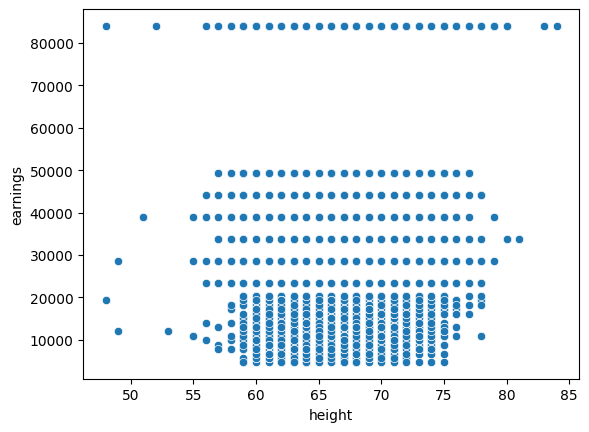

In [ ]:
sns.scatterplot(x='height', y='earnings', data=height_earnings)
plt.show()

Run a regression of Earnings on Height.


In [ ]:
# adding intercept
X = sm.add_constant(height_earnings['height'])

# fit the regression model
model = sm.OLS(height_earnings['earnings'], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     196.5
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           2.13e-44
Time:                        00:45:10   Log-Likelihood:            -2.0755e+05
No. Observations:               17870   AIC:                         4.151e+05
Df Residuals:                   17868   BIC:                         4.151e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -512.7336   3386.856     -0.151      0.8

What is the estimated slope?

> The estimated slope is 707.67 USD/inch


In [ ]:
estimated_slope = model.params['height']
print(f"Estimated Slope for Height: {estimated_slope}")

Estimated Slope for Height: 707.671558427412


Use the estimated regression to predict earnings for a worker who is 67 inches tall, for a worker who is 70 inches tall, and for a worker who is 65 inches tall.



In [ ]:
m = model.params['height']
b = model.params['const']

# prediction function
def predict_earnings(height):
    return m * height + b

small_sample_heights = [67, 70, 65]
predicted_earnings = [f"Predicted Earnings for Height {height} in: ${predict_earnings(height)}" for height in small_sample_heights]
print(f"{predicted_earnings}")

['Predicted Earnings for Height 67 in: $46901.260824725374', 'Predicted Earnings for Height 70 in: $49024.275500007614', 'Predicted Earnings for Height 65 in: $45485.917707870554']


Suppose height were measured in centimeters instead of inches. Answer the following questions about the Earnings on Height (in cm) regression.

What is the estimated slope?

> Estimated slope is 1 USD/cm



In [ ]:
height_earnings['height_cm'] = height_earnings['height'] * 2.54
X_cm = sm.add_constant(height_earnings['height_cm'])

# fit the regression model
model_cm = sm.OLS(height_earnings['height_cm'], X_cm).fit()

print(model_cm.summary())

                            OLS Regression Results                            
Dep. Variable:              height_cm   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.489e+29
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:45:10   Log-Likelihood:             4.4607e+05
No. Observations:               17870   AIC:                        -8.921e+05
Df Residuals:                   17868   BIC:                        -8.921e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.728e-12   4.42e-13     -3.914      0.0

What is the estimated intercept?

> -1.728e-12 cm is the estimated intercept



What is the R^2

> R^2 is 1


What is the standard error of the regression (RSE)?

> The RSE is 26777.24

In [ ]:
std_error_regression = model.scale ** 0.5
print(f"Standard Error of the Regression: {std_error_regression:.2f}")

Standard Error of the Regression: 26777.24


### Female



Run a regression of Earnings on Height using data for female workers only.

What is the estimated slope?

> The estimated slope is 511.2222 USD/inch



In [ ]:
female_heights = height_earnings[height_earnings["sex"] == 0]

XX = sm.add_constant(female_heights['height'])

# fit the regression model
model_XX = sm.OLS(female_heights['earnings'], XX).fit()

print(model_XX.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     26.72
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           2.40e-07
Time:                        00:45:10   Log-Likelihood:            -1.1585e+05
No. Observations:                9974   AIC:                         2.317e+05
Df Residuals:                    9972   BIC:                         2.317e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.265e+04   6383.741      1.982      0.0

A randomly selected woman is 1 inch taller than the average woman in the sample. Would you predict her earnings to be higher or lower than the average earnings for women in the sample? By how much?

> Since the estimated slope is positive, this tells us that as height increase so does earnings. So a woman who is 1 inch taller than the average woman would have higher earnings by about $511.22.

### Male

Run a regression of Earnings on Height using data for male workers only.

What is the estimated slope?

> The estimated slope is 1,306.86 USD/inch

In [ ]:
male_heights = height_earnings[height_earnings["sex"] == 1]

XY = sm.add_constant(male_heights['height'])

# fit the regression model
model_XY = sm.OLS(male_heights['earnings'], XY).fit()

print(model_XY.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     168.2
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           4.47e-38
Time:                        00:45:10   Log-Likelihood:                -91674.
No. Observations:                7896   AIC:                         1.834e+05
Df Residuals:                    7894   BIC:                         1.834e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.313e+04   7068.481     -6.102      0.0

A randomly selected man is 1 inch taller than the average man in the sample. Would you predict his earnings to be higher or lower than the average earnings for men in the sample? By how much?

> Since the estimated slope is positive, this tells us that as height increase so does earnings. So a man who is 1 inch taller than the average man would have higher earnings by about $1,306.86.